In [ ]:
pip install paho-mqtt

In [ ]:
import paho.mqtt.client as paho
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
X = []
Y = []
Pred = [[0]]


ModuleNotFoundError: ignored

In [ ]:
def on_connect(client, userdata, flags, rc):
    print('CONNACK received with code %d.' % (rc))

client = paho.Client()
client.on_connect = on_connect
client.connect('broker.mqttdashboard.com', 1883)

def column(matrix, i):
    return [row[i] for row in matrix]

def on_subscribe(client, userdata, mid, granted_qos):
    print("Subscribed: "+str(mid)+" "+str(granted_qos))

def on_message(client, userdata, msg):
    global X
    global Y
    global Pred
    global t
    obj = json.loads(msg.payload)
    t = float(obj['T'])
    h = float(obj['H'])
    dp = float(obj['DP'])
    newPred = [0]
    print(t,h,dp)
    newX = [t,h]
    newY = [dp]
    X.append(newX)
    Y.append(newY)
    if len(Y) <= 3: 
      print(X,Y,Pred)

    if len(Y) > 3:
      X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=9)
      LR=LinearRegression()
      LR.fit(X_train,Y_train)
      PRED = LR.predict(X_test)
      test_set_rmse = (np.sqrt(mean_squared_error(Y_test, PRED)))
      test_set_r2 = r2_score(Y_test, PRED)
      dp_pred = LR.predict([[t, h]])[0][0]
      newPred = [dp_pred]
      print(test_set_rmse, test_set_r2, dp_pred)

    Pred.append(newPred)
    
client.on_subscribe = on_subscribe
client.on_message = on_message
client.connect('broker.mqttdashboard.com', 1883)
client.subscribe('Opiframe/softsensor', qos=1)  
client.loop_forever()

CONNACK received with code 0.
Subscribed: 1 (1,)
19.0 32.0 4.9
[[19.0, 32.0]] [[4.9]] [[0]]
19.0 32.0 5.1
[[19.0, 32.0], [19.0, 32.0]] [[4.9], [5.1]] [[0], [0]]
19.0 32.0 5.1
[[19.0, 32.0], [19.0, 32.0], [19.0, 32.0]] [[4.9], [5.1], [5.1]] [[0], [0], [0]]
19.0 32.0 5.0
0.09999999999999964 nan 5.0
19.0 32.0 4.9
0.0 nan 5.0
19.0 32.0 5.0
0.09013878188659978 -2.2500000000000266 4.975
19.0 32.0 5.8
0.10295630140986979 -3.2400000000000126 5.14
19.0 32.0 5.5
0.27131367660166206 -0.8402777777777783 5.116666666666666
19.0 32.0 5.6
0.35355339059327323 -0.020408163265305257 5.200000000000001


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/regression.py:543: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


23.0 30.0 9.4
0.3535533905932736 -0.020408163265307477 9.399999999999999
23.0 30.0 9.0
0.32829526005986936 -0.34722222222221744 9.200000000000001
23.0 30.0 9.1
0.2813830703714542 0.97895487623671 9.046875
23.0 30.0 9.2
0.3168858890305259 0.9733092144122859 9.0
23.0 30.0 9.0
0.2692763740564701 0.9733637595663265 9.234375
23.0 30.0 8.6
0.1961959187691392 0.9858597735969388 9.0625
23.0 30.0 9.0
0.2833385990625881 0.9684244791666666 8.953125
23.0 30.0 8.9
0.2240626734479731 0.9820819695266017 9.028571428571428
23.0 30.0 9.4
0.352003196008218 0.95545944731521 9.075
23.0 28.0 9.0
0.3986226285598963 -0.35957219251337813 9.0
23.0 28.0 8.2
0.3986226285598944 -0.3595721925133655 8.600000000000001
23.0 28.0 8.7
0.32268405600525 0.9653194111377567 8.63333333333333
23.0 28.0 8.7
0.32268405600525 0.9653194111377567 8.649999999999999
23.0 28.0 8.9
0.32268405600525 0.9653194111377567 8.699999999999996
23.0 28.0 8.1
0.32268405600525174 0.9653194111377563 8.599999999999998
23.0 28.0 8.4
0.32268405600525

KeyboardInterrupt: ignored

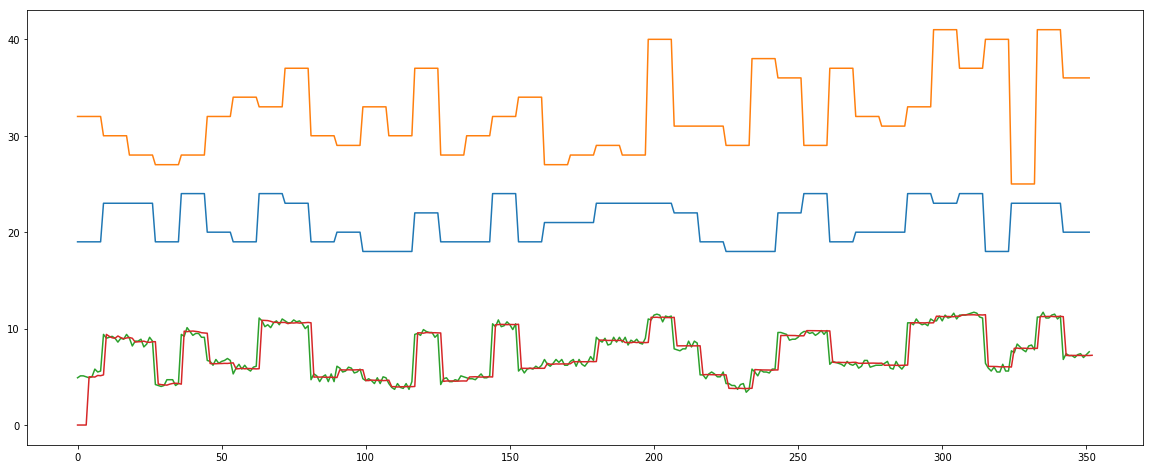

In [ ]:
global X
plt.figure(figsize=(20,8))
plt.plot(X)
plt.plot(Y)
plt.plot(Pred)